# Advertising Data Analysis

**Course:** Statistics and Mathematics for Data Analysts  
**Academy:** Hamrah Aval

This notebook analyzes advertising spending across TV, Radio, and Newspaper channels and their impact on sales.

## Contents
1. [Data Loading & Exploration](#-1.-Load-Data)
2. [Exploratory Data Analysis (EDA)](#-2.-Exploratory-Data-Analysis)
3. [Matrix Analysis & SVD](#-3.-Matrix-Analysis-&-Dimensionality-Reduction)
4. [Linear Regression Modeling](#-4.-Linear-Regression)
5. [Bayesian Inference](#-5.-Bayesian-Inference)
+ [Summary](#-Summary)

## Import Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.linalg import svd
import warnings

# Settings
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
warnings.filterwarnings('ignore')

## 1. Load Data

In [2]:
# Load dataset
df = pd.read_csv('../data/raw/advertising_Dataset.csv')

# Remove index column if exists
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nMissing values: {df.isnull().sum().sum()}")

df.head()

Dataset shape: (200, 4)

Columns: ['TV', 'Radio', 'Newspaper', 'Sales']

Missing values: 0


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## 2. Exploratory Data Analysis

### Descriptive Statistics

In [3]:
# Calculate statistics
print("=== Descriptive Statistics ===")
print(f"\nMean:\n{df.mean()}")
print(f"\nMedian:\n{df.median()}")
print(f"\nVariance:\n{df.var()}")
print(f"\nStandard Deviation:\n{df.std()}")

# Full summary
df.describe()

=== Descriptive Statistics ===

Mean:
TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         14.0225
dtype: float64

Median:
TV           149.75
Radio         22.90
Newspaper     25.75
Sales         12.90
dtype: float64

Variance:
TV           7370.949893
Radio         220.427743
Newspaper     474.308326
Sales          27.221853
dtype: float64

Standard Deviation:
TV           85.854236
Radio        14.846809
Newspaper    21.778621
Sales         5.217457
dtype: float64


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Visualizations

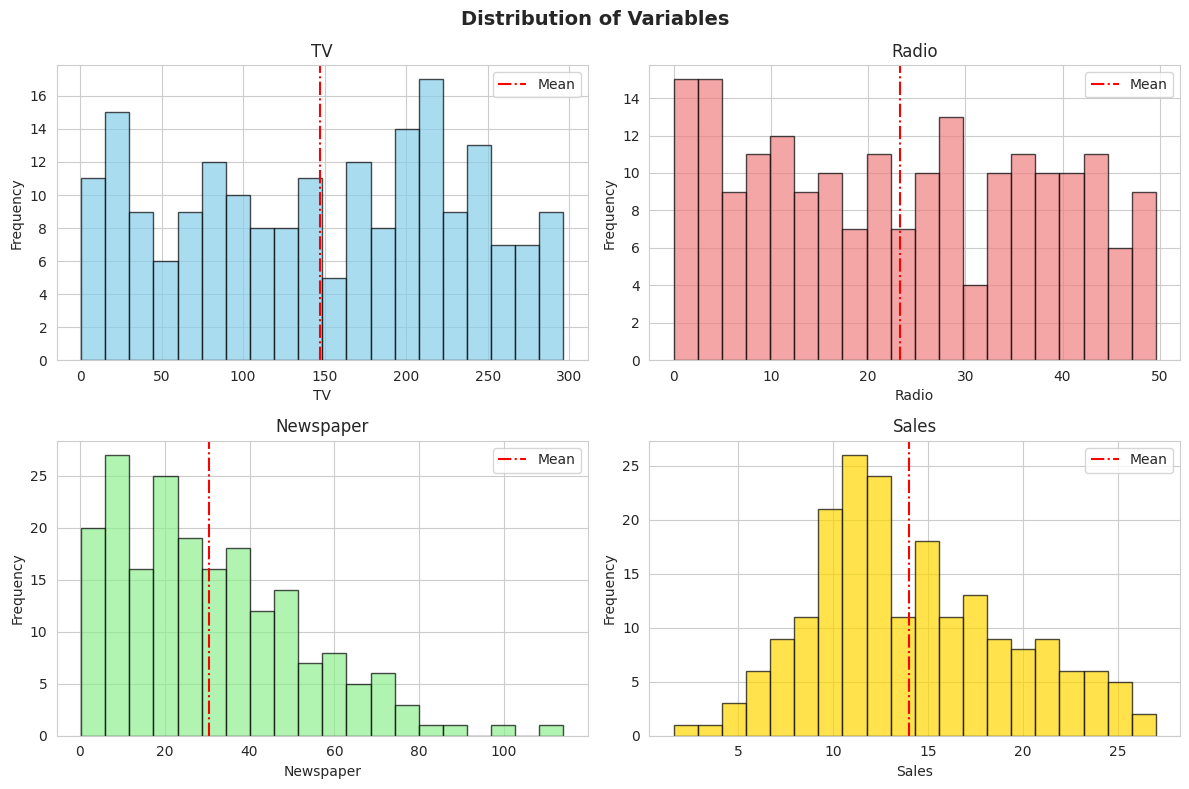

In [7]:
# Histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Distribution of Variables', fontsize=14, fontweight='bold')

variables = ['TV', 'Radio', 'Newspaper', 'Sales']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

for idx, (var, color) in enumerate(zip(variables, colors)):
    row, col = idx // 2, idx % 2
    axes[row, col].hist(df[var], bins=20, color=color, edgecolor='black', alpha=0.7)
    axes[row, col].set_title(f'{var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].axvline(df[var].mean(), color='red', linestyle='-.', label=f'Mean')
    axes[row, col].legend()

plt.tight_layout()
plt.show()

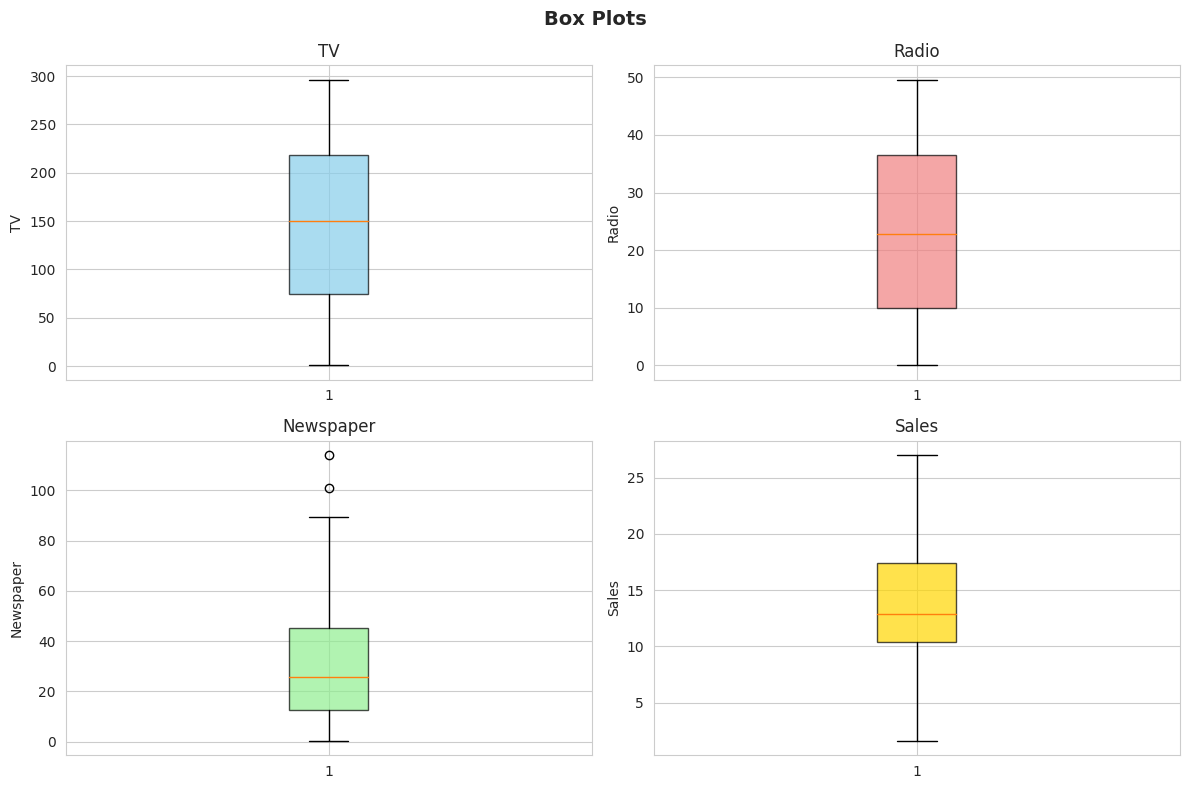

In [8]:
# Box plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Box Plots', fontsize=14, fontweight='bold')

for idx, (var, color) in enumerate(zip(variables, colors)):
    row, col = idx // 2, idx % 2
    axes[row, col].boxplot(df[var], vert=True, patch_artist=True,
                          boxprops=dict(facecolor=color, alpha=0.7))
    axes[row, col].set_title(f'{var}')
    axes[row, col].set_ylabel(var)

plt.tight_layout()
plt.show()

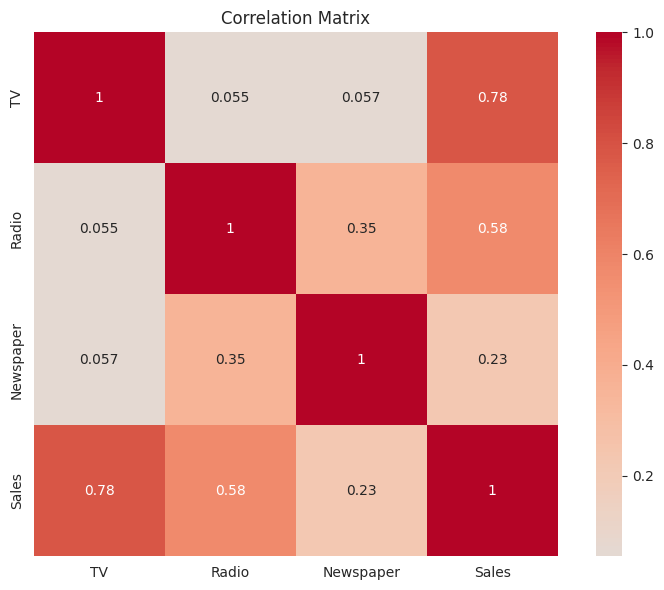


Correlation with Sales:
Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64


In [9]:
# Correlation matrix
plt.figure(figsize=(8, 6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

print("\nCorrelation with Sales:")
print(corr['Sales'].sort_values(ascending=False))

## 3. Matrix Analysis & Dimensionality Reduction

### Covariance Matrix

Covariance Matrix:
                    TV       Radio   Newspaper
TV         7370.949893   69.862492  105.919452
Radio        69.862492  220.427743  114.496979
Newspaper   105.919452  114.496979  474.308326


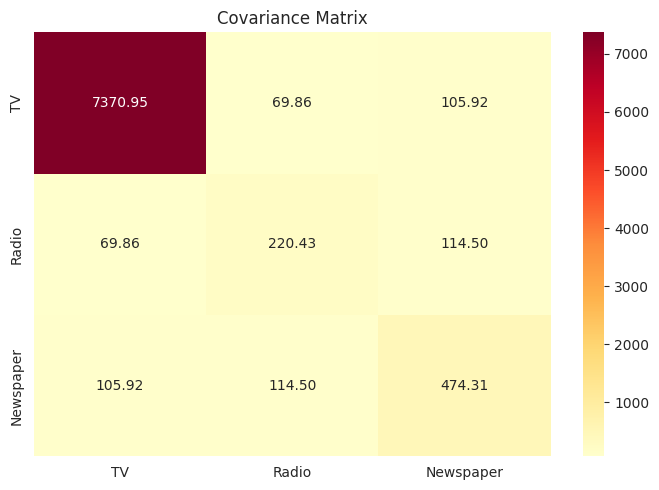

In [10]:
# Features matrix
X = df[['TV', 'Radio', 'Newspaper']].values

# Covariance matrix
cov_matrix = np.cov(X.T)

print("Covariance Matrix:")
print(pd.DataFrame(cov_matrix, 
                   columns=['TV', 'Radio', 'Newspaper'],
                   index=['TV', 'Radio', 'Newspaper']))

# Visualize
plt.figure(figsize=(7, 5))
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='YlOrRd', 
            xticklabels=['TV', 'Radio', 'Newspaper'],
            yticklabels=['TV', 'Radio', 'Newspaper'])
plt.title('Covariance Matrix')
plt.tight_layout()
plt.show()

### Eigenvalues & Eigenvectors

In [11]:
# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort by eigenvalues
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print("Eigenvalues:")
for i, ev in enumerate(eigenvalues, 1):
    print(f"  λ{i}: {ev:.4f}")

print("\nEigenvectors:")
print(pd.DataFrame(eigenvectors,
                   columns=[f'PC{i+1}' for i in range(len(eigenvalues))],
                   index=['TV', 'Radio', 'Newspaper']))

# Explained variance
explained_var = eigenvalues / eigenvalues.sum()
print("\nExplained Variance Ratio:")
for i, var in enumerate(explained_var, 1):
    print(f"  PC{i}: {var:.4f} ({var*100:.2f}%)")

Eigenvalues:
  λ1: 7373.2934
  λ2: 516.0766
  λ3: 176.3160

Eigenvectors:
                PC1       PC2       PC3
TV         0.999829  0.018071  0.003806
Radio      0.010014 -0.357362 -0.933912
Newspaper  0.015516 -0.933791  0.357482

Explained Variance Ratio:
  PC1: 0.9142 (91.42%)
  PC2: 0.0640 (6.40%)
  PC3: 0.0219 (2.19%)


### Singular Value Decomposition (SVD)

In [12]:
# Normalize data
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)

# Perform SVD
U, S, Vt = svd(X_norm, full_matrices=False)

print("Singular Values:")
for i, s in enumerate(S, 1):
    print(f"  σ{i}: {s:.4f}")

# Variance explained
variance = (S ** 2) / (len(X_norm) - 1)
var_ratio = variance / variance.sum()

print("\nVariance Explained by Components:")
for i, var in enumerate(var_ratio, 1):
    print(f"  Component {i}: {var:.4f} ({var*100:.2f}%)")

Singular Values:
  σ1: 16.5581
  σ2: 14.0232
  σ3: 11.3657

Variance Explained by Components:
  Component 1: 0.4570 (45.70%)
  Component 2: 0.3278 (32.78%)
  Component 3: 0.2153 (21.53%)


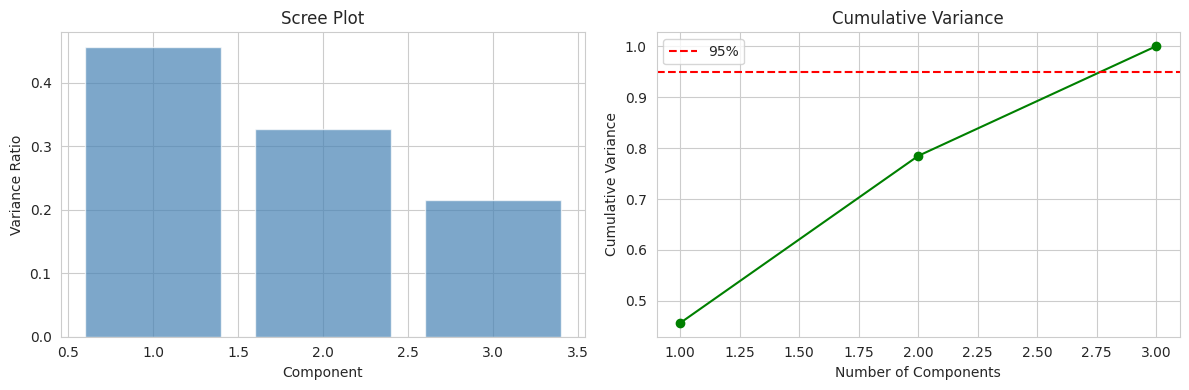

In [13]:
# Visualize explained variance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Scree plot
ax1.bar(range(1, len(var_ratio) + 1), var_ratio, color='steelblue', alpha=0.7)
ax1.set_xlabel('Component')
ax1.set_ylabel('Variance Ratio')
ax1.set_title('Scree Plot')

# Cumulative variance
cumsum = np.cumsum(var_ratio)
ax2.plot(range(1, len(cumsum) + 1), cumsum, 'o-', color='green')
ax2.axhline(y=0.95, color='r', linestyle='--', label='95%')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Variance')
ax2.set_title('Cumulative Variance')
ax2.legend()

plt.tight_layout()
plt.show()

## 4. Linear Regression

**Model:** Sales = β₀ + β₁×TV + β₂×Radio + β₃×Newspaper

In [14]:
# Prepare data
X = df[['TV', 'Radio', 'Newspaper']].values
y = df['Sales'].values

# Add intercept
X_int = np.column_stack([np.ones(len(X)), X])

print(f"X shape: {X_int.shape}")
print(f"y shape: {y.shape}")

X shape: (200, 4)
y shape: (200,)


### Solve using Matrix Operations

In [15]:
# Method 1: Normal equation (X'X)^-1 X'y
XtX = X_int.T @ X_int
Xty = X_int.T @ y
beta_inv = np.linalg.inv(XtX) @ Xty

print("Coefficients (Matrix Inverse):")
print(f"  β₀ (Intercept): {beta_inv[0]:.4f}")
print(f"  β₁ (TV):        {beta_inv[1]:.4f}")
print(f"  β₂ (Radio):     {beta_inv[2]:.4f}")
print(f"  β₃ (Newspaper): {beta_inv[3]:.4f}")

Coefficients (Matrix Inverse):
  β₀ (Intercept): 2.9389
  β₁ (TV):        0.0458
  β₂ (Radio):     0.1885
  β₃ (Newspaper): -0.0010


In [16]:
# Method 2: SVD (more stable)
U, S, Vt = svd(X_int, full_matrices=False)
beta_svd = Vt.T @ np.diag(1/S) @ U.T @ y

print("Coefficients (SVD):")
print(f"  β₀ (Intercept): {beta_svd[0]:.4f}")
print(f"  β₁ (TV):        {beta_svd[1]:.4f}")
print(f"  β₂ (Radio):     {beta_svd[2]:.4f}")
print(f"  β₃ (Newspaper): {beta_svd[3]:.4f}")

# Use SVD coefficients
beta = beta_svd

Coefficients (SVD):
  β₀ (Intercept): 2.9389
  β₁ (TV):        0.0458
  β₂ (Radio):     0.1885
  β₃ (Newspaper): -0.0010


### Model Evaluation

In [17]:
# Predictions and residuals
y_pred = X_int @ beta
residuals = y - y_pred

# Metrics
n = len(y)
p = X.shape[1]

SST = np.sum((y - y.mean()) ** 2)
SSR = np.sum((y_pred - y.mean()) ** 2)
SSE = np.sum(residuals ** 2)

r2 = SSR / SST
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mse = SSE / (n - p - 1)
rmse = np.sqrt(mse)

print("Model Performance:")
print(f"  R²:           {r2:.4f}")
print(f"  Adjusted R²:  {adj_r2:.4f}")
print(f"  RMSE:         {rmse:.4f}")

Model Performance:
  R²:           0.8972
  Adjusted R²:  0.8956
  RMSE:         1.6855


In [18]:
# Statistical tests
var_beta = mse * np.linalg.inv(X_int.T @ X_int)
se_beta = np.sqrt(np.diag(var_beta))
t_stats = beta / se_beta
p_values = 2 * (1 - stats.t.cdf(np.abs(t_stats), n - p - 1))

# Results table
results = pd.DataFrame({
    'Coefficient': beta,
    'Std Error': se_beta,
    't-value': t_stats,
    'p-value': p_values
}, index=['Intercept', 'TV', 'Radio', 'Newspaper'])

print("\nRegression Results:")
print(results)


Regression Results:
           Coefficient  Std Error    t-value   p-value
Intercept     2.938889   0.311908   9.422288  0.000000
TV            0.045765   0.001395  32.808624  0.000000
Radio         0.188530   0.008611  21.893496  0.000000
Newspaper    -0.001037   0.005871  -0.176715  0.859915


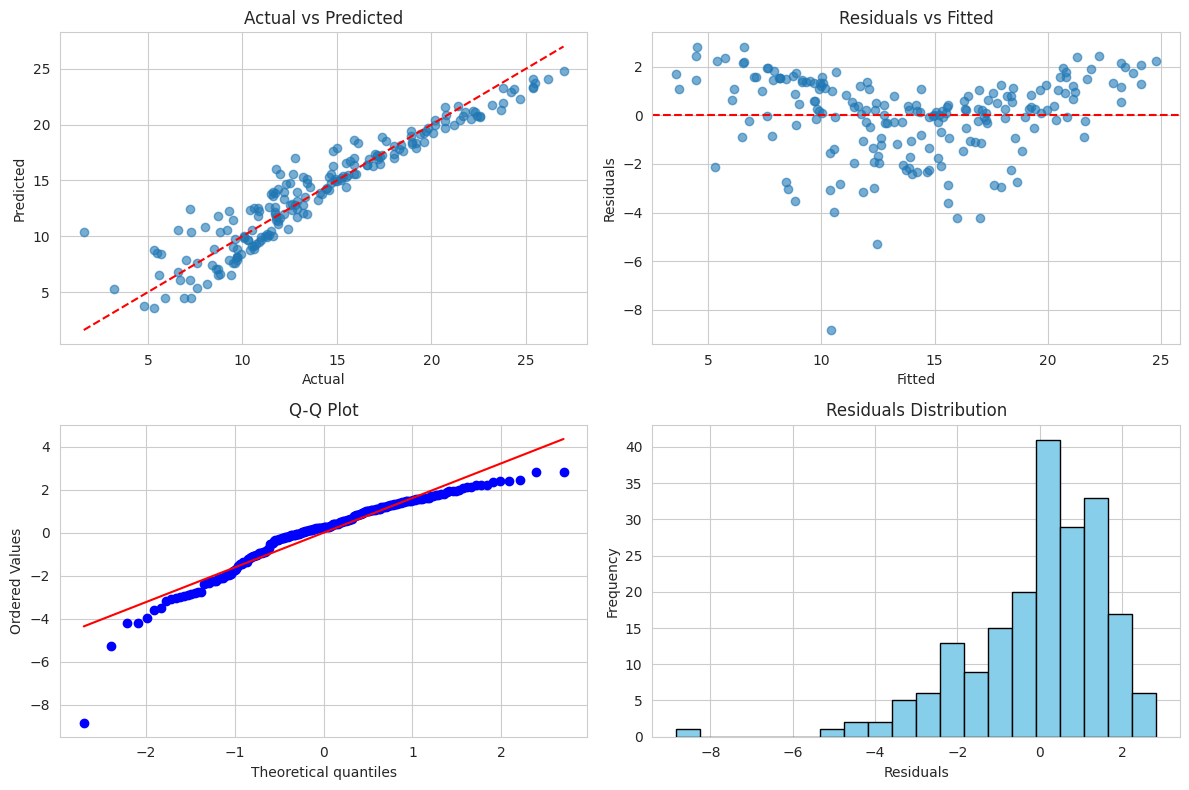

In [19]:
# Diagnostic plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Actual vs Predicted
axes[0, 0].scatter(y, y_pred, alpha=0.6)
axes[0, 0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
axes[0, 0].set_xlabel('Actual')
axes[0, 0].set_ylabel('Predicted')
axes[0, 0].set_title('Actual vs Predicted')

# Residuals vs Fitted
axes[0, 1].scatter(y_pred, residuals, alpha=0.6)
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_xlabel('Fitted')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residuals vs Fitted')

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot')

# Residuals histogram
axes[1, 1].hist(residuals, bins=20, color='skyblue', edgecolor='black')
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Residuals Distribution')

plt.tight_layout()
plt.show()

## 5. Bayesian Inference

Estimate the probability of "High Sales" (above median)

In [20]:
# Define high sales
median_sales = df['Sales'].median()
high_sales = (df['Sales'] > median_sales).sum()
low_sales = len(df) - high_sales

print(f"Sales Median: {median_sales:.2f}")
print(f"High Sales Count: {high_sales}")
print(f"Low Sales Count: {low_sales}")
print(f"Proportion: {high_sales/len(df):.4f}")

Sales Median: 12.90
High Sales Count: 98
Low Sales Count: 102
Proportion: 0.4900


In [25]:
# Bayesian update
# Prior: Beta(1, 1) - uniform
alpha_prior = 1
beta_prior = 1

# Posterior: Beta(α + high, β + low)
alpha_post = alpha_prior + high_sales
beta_post = beta_prior + low_sales

# Posterior mean
post_mean = alpha_post / (alpha_post + beta_post)

# Credible interval
ci = stats.beta.interval(0.95, alpha_post, beta_post)
print(f"\nPrior: Beta({alpha_prior}, {beta_prior})")
print(f"Posterior: Beta({alpha_post}, {beta_post})")
print(f"\nPosterior Mean: {post_mean:.4f}")
print(f"95% Credible Interval: [{ci[0]:.4f}, {ci[1]:.4f}]")


Prior: Beta(1, 1)
Posterior: Beta(99, 103)

Posterior Mean: 0.4901
95% Credible Interval: [0.4215, 0.5589]


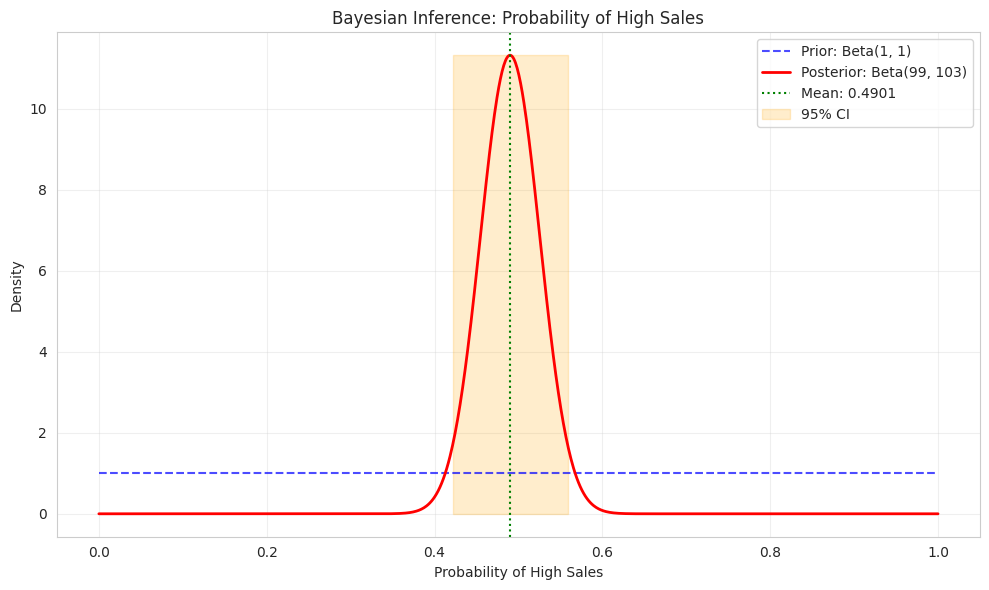

In [29]:
# Visualize
x = np.linspace(0, 1, 1000)
prior = stats.beta.pdf(x, alpha_prior, beta_prior)
posterior = stats.beta.pdf(x, alpha_post, beta_post)

plt.figure(figsize=(10, 6))
plt.plot(x, prior, 'b--', label=f'Prior: Beta({alpha_prior}, {beta_prior})', alpha=0.7)
plt.plot(x, posterior, 'r-', label=f'Posterior: Beta({alpha_post}, {beta_post})', linewidth=2)
plt.axvline(post_mean, color='green', linestyle=':', label=f'Mean: {post_mean:.4f}')
plt.fill_betweenx([0, max(posterior)], ci[0], ci[1], color='orange', alpha=0.2, label='95% CI')

plt.xlabel('Probability of High Sales')
plt.ylabel('Density')
plt.title('Bayesian Inference: Probability of High Sales')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Summary

**Key Findings:**
- TV advertising has the strongest correlation with sales
- The regression model explains a significant portion of sales variance
- TV and Radio are significant predictors (check p-values)
- Bayesian analysis provides probabilistic estimates for high sales events